## 0 Computer vision libraries in pytorch

* `Torchvision.datasets - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that can leverage for my own problem

* `Torchvision.transforms` - functions for manipulating your vision data to be suitable with ML model

* `torch.utils.data.Dataset` - Base dataset class for Pytorch
* `torch.utils.data.DataLoader` - Create python iterable over dataset


In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

c:\Users\aelsha33\AppData\Local\anaconda3\envs\ML\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


2.3.0
0.15.2a0


## 1. Getting a dataset

In [2]:
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train= True, # do we want the training dataset?
    download= True, # do we want to download?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None #how do we want to transform the labels/ targetsaa ? 
    )

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None 
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image , label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

###  Visualize!!

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

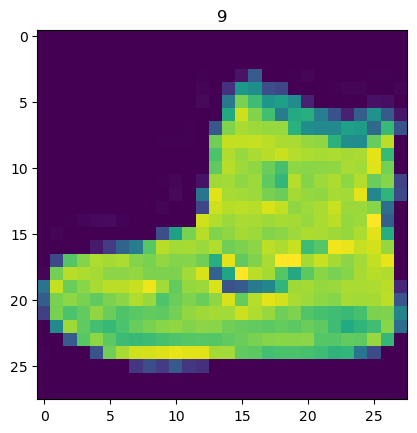

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(label)


(-0.5, 27.5, 27.5, -0.5)

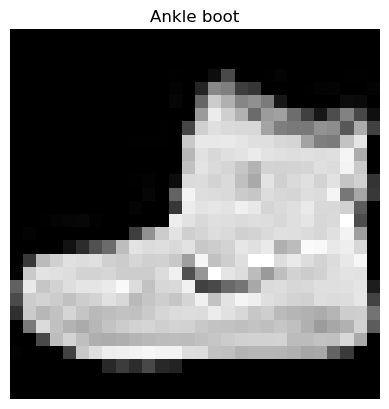

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.axis(False)

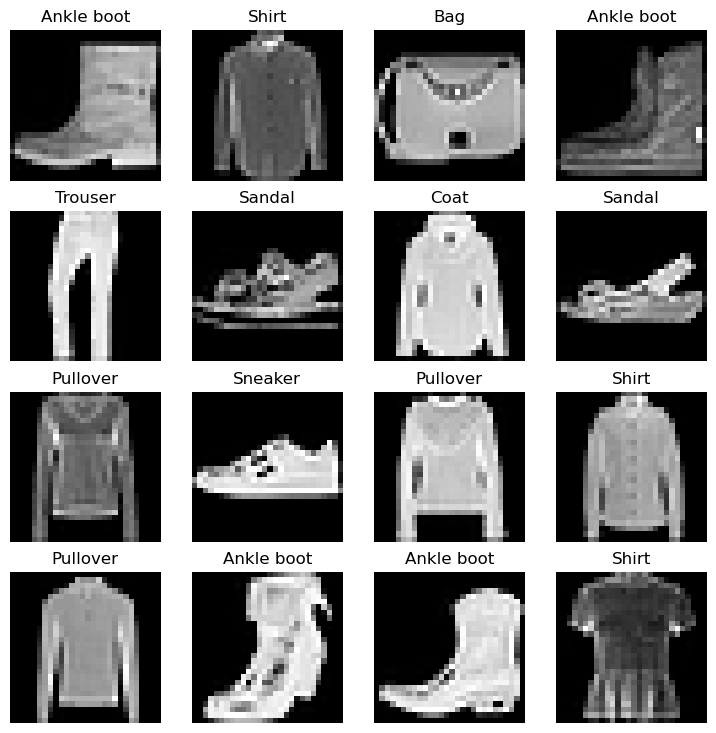

In [11]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows , cols = 4,4
for i in range(1, rows * cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img , label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_name[label])
    plt.axis(False)
    

## 2. Preparing DataLoader
Right now, our data is in the form of Pytorch datasets.

We want to turn data into batches
why!?

1. It is more computationally efficient , as in, your computing hardware may not be able to look (store in memory) at 6000 image at once.

2. It allows to update its gradient per epoch more.

In [12]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data,
                              batch_size= BATCH_SIZE,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size= BATCH_SIZE,
                             shuffle= False)


In [14]:
#Checking
print(f"DataLoaderS: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaderS: (<torch.utils.data.dataloader.DataLoader object at 0x0000021F72DF11E0>, <torch.utils.data.dataloader.DataLoader object at 0x0000021F67756E90>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [15]:
train_features_batch , train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


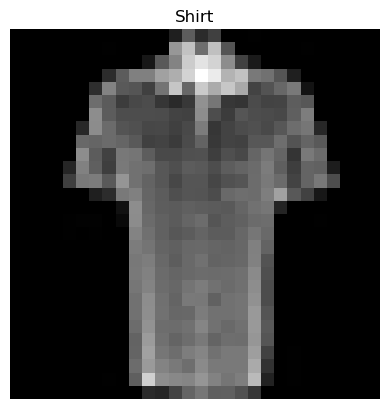

In [16]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size =[1]).item()
img , label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model_0 Build a basline model
When starting to build a series of machine learining modelling experiments, its best practice to start with a baseline model


In [17]:
# Create a flatten layer
flatten_model = nn.Flatten()

#Get a single sample
x = train_features_batch[0]
x.shape

# Flatten the sample
output = flatten_model(x) # perform forward pass

#Print what happen
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features= hidden_units),
            nn.Linear(in_features= hidden_units,
                      out_features= output_shape)
        )
        
    def forward(self , x):
        return self.layer_stack(x)

In [19]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units = 10,
                              output_shape = len(class_name)).to("cpu")
model_0


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

## 3.1 Setup loss , optimizer and evaluation metrics

* loss function for multiclass `nn.CrossEntropyLoss()`
* Optimizer `torch.optim.SDG()`
* Evaluation metric 

In [21]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)


In [22]:
##function to time our experiments
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device= None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f}seconds")
    return total_time

In [23]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end= end_time, device="cpu")

Train time on cpu: 0.000seconds


1.9799999790848233e-05

### 3.3 Creating a training loop and training a model on batches of data
1. Loop through epochs
2. Loop through training batches, perform training steps, calculate training loss
3. loop for testing
4. print what happen


In [24]:
from tqdm.auto import tqdm

#Set the seed and start the timer
torch.manual_seed(42)
train_time = timer()

epochs = 3 

#Create training test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n---------")
    ## training
    train_loss = 0
    # Add a loop to loop through the training batches 
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        #1. Forward pass
        y_pred = model_0(X)
        #2. Calculate loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss #accumulate train loss
        
        #3. Optimizer zero grad
        optimizer.zero_grad()
        #4. loss backward
        loss.backward()
        #5. optimizer step
        optimizer.step()
        
        #Print out whats happening 
        if batch % 400 == 0:
            print(f"looked at {batch * len(X)}/{len(train_dataloader.dataset)} Samples")
    train_loss/= len(train_dataloader)
    ### Testing
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            #1. Forward pass
            test_pred = model_0(X_test)
            
            #2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)
            #3. Calculate accuracy
            test_acc+= accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
            
        # Calculate the test loss average per batch
        test_loss/= len(test_dataloader)
            
        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)
            
    print(f"\nTrain loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test acc: {test_acc}")
            
train_time_end = timer()
total_train_time = print_train_time(start= train_time,
                                                end= train_time_end,
                                                device= str(next(model_0.parameters()).device))

c:\Users\aelsha33\AppData\Local\anaconda3\envs\ML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
---------
looked at 0/60000 Samples
looked at 12800/60000 Samples
looked at 25600/60000 Samples
looked at 38400/60000 Samples
looked at 51200/60000 Samples


 33%|███▎      | 1/3 [00:08<00:16,  8.30s/it]


Train loss: 0.5904 | Test Loss: 0.5095, Test acc: 82.03873801916933
Epoch: 1 
---------
looked at 0/60000 Samples
looked at 12800/60000 Samples
looked at 25600/60000 Samples
looked at 38400/60000 Samples
looked at 51200/60000 Samples


 67%|██████▋   | 2/3 [00:16<00:08,  8.09s/it]


Train loss: 0.4763 | Test Loss: 0.4799, Test acc: 83.19688498402556
Epoch: 2 
---------
looked at 0/60000 Samples
looked at 12800/60000 Samples
looked at 25600/60000 Samples
looked at 38400/60000 Samples
looked at 51200/60000 Samples


100%|██████████| 3/3 [00:24<00:00,  8.08s/it]


Train loss: 0.4550 | Test Loss: 0.4766, Test acc: 83.42651757188499
Train time on cpu: 24.255seconds


## 4 Make prediction and get results

In [25]:
import torch.utils
import torch.utils.data


torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0 , 0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)
            
            # Accmulate the loss and the acc values per batch
            loss+= loss_fn(y_pred, y)
            acc += accuracy_fn(y_true= y,
                               y_pred = y_pred.argmax(dim=1)) 
        loss/= len(data_loader) 
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc" : acc}
    
model_0_results = eval_model(model= model_0,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results


100%|██████████| 313/313 [00:00<00:00, 345.09it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 6. Model 1 is built with non-linearity

In [26]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features= hidden_units),
            nn.ReLU(),
            nn.Linear(in_features= hidden_units,
                      out_features= output_shape),
            nn.ReLU()
        )
        
    def forward(self , x: torch.Tensor):
        return self.layer_stack(x)

In [27]:
next(model_0.parameters()).device

device(type='cpu')

In [28]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_name)).to("cpu")

next(model_1.parameters()).device

device(type='cpu')

In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.1)

## 6.2 Functionizing training and testing

In [30]:
def train_step(model :torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
    train_loss , train_acc = 0 , 0
    model.train()
    # Add a loop to loop through the training batches 
    for batch, (X,y) in enumerate(dataloader):
        X,y = X.to(device), y.to(device)
        #1. Forward pass
        y_pred = model(X)
        #2. Calculate loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss #accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred= y_pred.argmax(dim=1))
        #3. Optimizer zero grad
        optimizer.zero_grad()
        #4. loss backward
        loss.backward()
        #5. optimizer step
        optimizer.step()
        
    #Print out whats happening 
            
    train_loss/= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [31]:
def test_step(model :torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
    test_loss, test_acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in dataloader:
            X,y = X.to(device), y.to(device)
            #1. Forward pass
            test_pred = model(X)
            
            #2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y)
            #3. Calculate accuracy
            test_acc+= accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
            
        # Calculate the test loss average per batch
        test_loss/= len(dataloader)
            
        # Calculate the test acc average per batch
        test_acc /= len(dataloader)
            
    print(f"\nTrain loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test acc: {test_acc}")
            

In [32]:
torch.manual_seed(42)

from timeit import default_timer as Timer

train_start_time = timer()

epoch = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epochs}\n----")
    train_step(model=model_1,
               dataloader=train_dataloader,
               loss_fn = loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device = "cpu")
    
    test_step(model=model_1,
               dataloader=test_dataloader,
               loss_fn = loss_fn,
               accuracy_fn=accuracy_fn,
               device = "cpu")
    
train_time_end = timer()

total_time = print_train_time(start=train_start_time,
                            end=train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 3
----
Train loss: 1.09199 | Train acc: 61.34%


 33%|███▎      | 1/3 [00:08<00:16,  8.21s/it]


Train loss: 0.4550 | Test Loss: 0.9564, Test acc: 64.99600638977635
Epoch: 3
----
Train loss: 0.78101 | Train acc: 71.93%


 67%|██████▋   | 2/3 [00:16<00:08,  8.22s/it]


Train loss: 0.4550 | Test Loss: 0.7223, Test acc: 73.91174121405751
Epoch: 3
----
Train loss: 0.67027 | Train acc: 75.94%


100%|██████████| 3/3 [00:24<00:00,  8.09s/it]


Train loss: 0.4550 | Test Loss: 0.6850, Test acc: 75.01996805111821
Train time on None: 24.280seconds


In [33]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [34]:
model_1_results = eval_model(model= model_1,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

100%|██████████| 313/313 [00:00<00:00, 332.72it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

# Creating CNN

In [35]:

class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int , hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape),
        )
        
    def forward(self, x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x= self.classifier(x)
        #print(x.shape)
        return x

In [36]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_name)).to("cpu")

In [37]:
img.shape

torch.Size([1, 28, 28])

In [38]:
model_2(img.unsqueeze(0).to("cpu"))

tensor([[ 0.0336, -0.0608,  0.0488, -0.0278, -0.0114,  0.0173, -0.0064, -0.0112,
          0.0315,  0.0112]], grad_fn=<AddmmBackward0>)

Text(0.5, 1.0, 'Shirt')

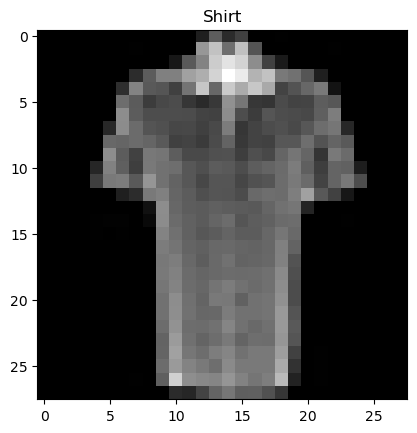

In [39]:
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_name[label])


In [40]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

## Training and testing model2 using premade function

In [41]:
torch.manual_seed(42)
start_time = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epochs: {epoch}\n------")
    train_step(model=model_2,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               optimizer=optimizer,
               device="cpu")
    test_step(model= model_2,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device="cpu")
    end_time = timer()
    
    model_2_train_time = print_train_time(start=start_time, end=end_time)
    
    

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
------
Train loss: 0.58763 | Train acc: 78.58%


 33%|███▎      | 1/3 [00:24<00:48, 24.33s/it]


Train loss: 0.4550 | Test Loss: 0.3899, Test acc: 85.99241214057508
Train time on None: 24.359seconds
Epochs: 1
------
Train loss: 0.36124 | Train acc: 87.00%


 67%|██████▋   | 2/3 [00:48<00:24, 24.08s/it]


Train loss: 0.4550 | Test Loss: 0.3565, Test acc: 86.63138977635782
Train time on None: 48.269seconds
Epochs: 2
------
Train loss: 0.32495 | Train acc: 88.14%


100%|██████████| 3/3 [01:13<00:00, 24.61s/it]


Train loss: 0.4550 | Test Loss: 0.3271, Test acc: 87.96924920127796
Train time on None: 73.853seconds


In [42]:
model_2_results = eval_model(
    model= model_2,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
)
model_2_results


100%|██████████| 313/313 [00:01<00:00, 177.54it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32708606123924255,
 'model_acc': 87.96924920127796}

In [43]:
import pandas as pd
compared_results = pd.DataFrame([model_0_results,
                                 model_1_results,
                                 model_2_results])
compared_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327086,87.969249


Text(0, 0.5, 'model')

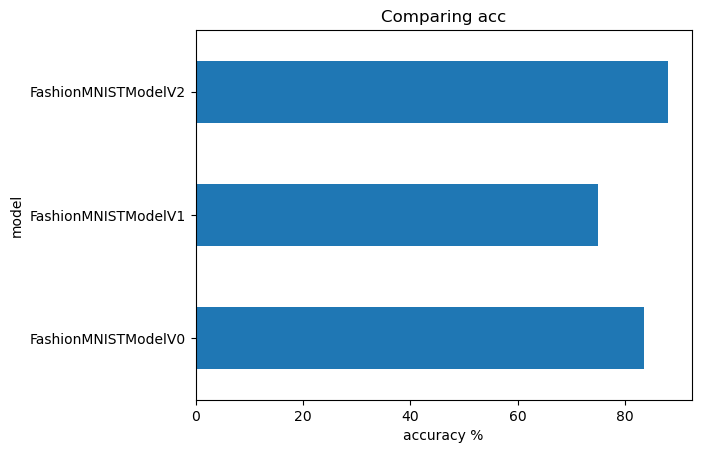

In [44]:
compared_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.title("Comparing acc")
plt.xlabel("accuracy %")
plt.ylabel("model")

In [45]:
def make_predictions(model,
                     data):
    pred_probs = []
    model.to("cpu")
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim = 0).to("cpu")
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(),dim = 0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)
            

In [46]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
    
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sneaker')

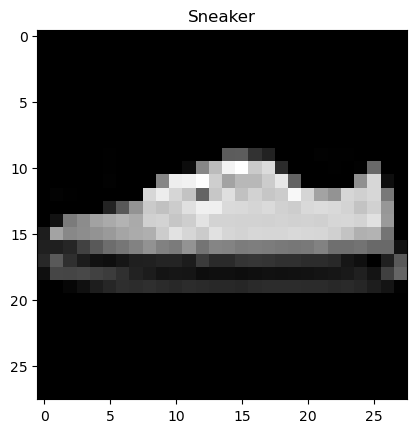

In [47]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_name[test_labels[0]])

In [48]:
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:2]


tensor([[1.9834e-07, 4.9006e-07, 1.0932e-06, 3.7571e-06, 4.2297e-07, 1.7518e-03,
         4.0103e-08, 9.9815e-01, 6.5476e-05, 2.3774e-05],
        [3.2295e-03, 1.8511e-05, 8.2260e-01, 1.0403e-03, 9.5975e-04, 9.0798e-06,
         1.7202e-01, 4.8085e-06, 6.2660e-05, 5.3711e-05]])

In [49]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([7, 2, 7, 3, 6, 2, 8, 7, 6])

In [50]:
test_labels

[7, 2, 7, 3, 2, 2, 8, 7, 6]

In [51]:
test_labels == list(pred_classes)

False

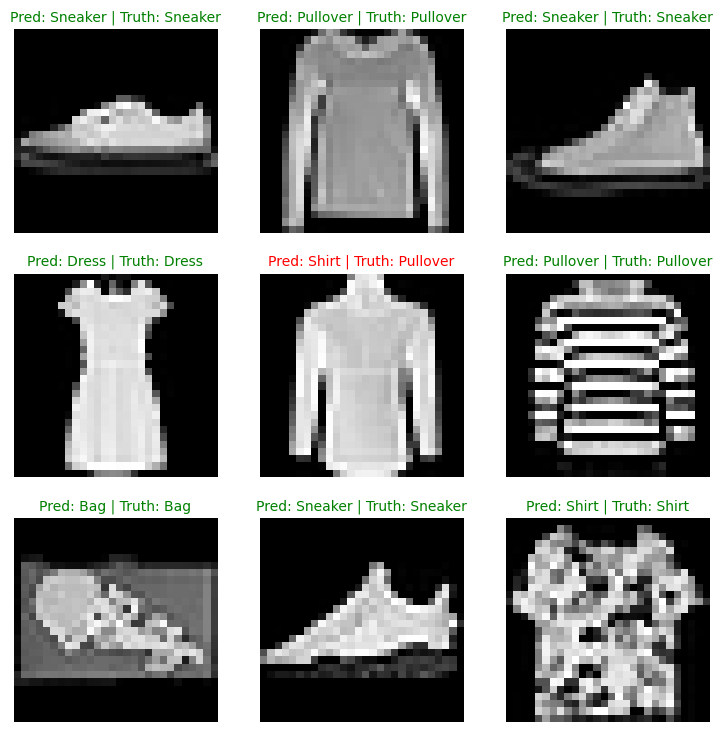

In [52]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i , sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    pred_label = class_name[pred_classes[i]]
    truth_label = class_name[test_labels[i]]
    title_test = f"Pred: {pred_label} | Truth: {truth_label}"
    if pred_label == truth_label:
        plt.title(title_test, fontsize = 10, c="g")
    else:
        plt.title(title_test, fontsize = 10, c="r")
    plt.axis(False)

## 10 Making a confusion matrix for prediction

A confusion matrix is a fantastic way of evaluation your classificstion models

1. Make a predictions with our trained model on thr test
2. Make confusion matrix `torch.metrics.ConfusionMatrix`

In [53]:
#1. Make predicitons
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader,desc="make_predictions..."):
        X,y = X.to("cpu"), y.to("cpu")
        y_logits = model_2(X)
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor
        

make_predictions...: 100%|██████████| 313/313 [00:01<00:00, 179.69it/s]


tensor([9, 2, 1,  ..., 8, 1, 8])

In [54]:
len(y_pred_tensor)

10000

In [55]:
import torchmetrics
import mlxtend

In [56]:
#from torchmetrics import ConfusionMatrix
#from mlxtend.plotting import plot_confusion_matrix

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
from torchmetrics import ConfusionMatrix
from sklearn import metrics

# Confusion instances and compare predictions to targets
confmat =ConfusionMatrix(task="MULTICLASS", num_classes=len(class_name))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)
# plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = confmat_tensor.numpy(),
                                 display_labels=class_name)


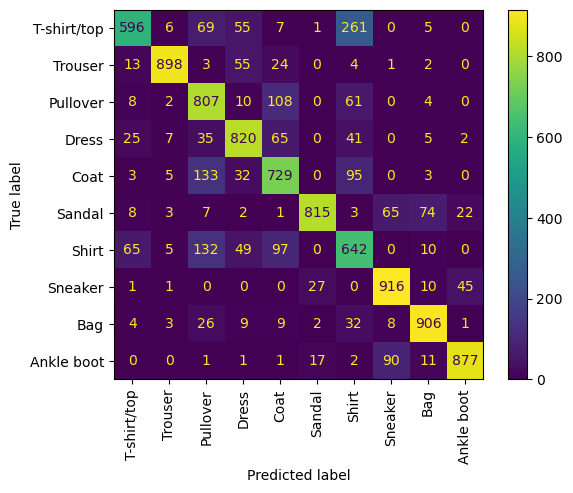

In [58]:
disp.plot(xticks_rotation='vertical')

##11. Save and load best performing model

In [59]:
from pathlib import Path 
Model_path = Path("models")
Model_path.mkdir(parents=True,
                 exist_ok=True)
Model_name = "03_pytorch_V3.pt"
model_save_path = Model_path/Model_name
model_save_path

WindowsPath('models/03_pytorch_V3.pt')

In [60]:
print(f"Saving model to: {model_save_path}")
torch.save(obj= model_2.state_dict(),f= model_save_path)

Saving model to: models\03_pytorch_V3.pt


In [61]:
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_name))
#load saved state_dict
loaded_model_2.load_state_dict(torch.load(f=model_save_path))
#send model to target device
loaded_model_2.to("cpu")



FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [62]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32708606123924255,
 'model_acc': 87.96924920127796}

In [63]:
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_results

100%|██████████| 313/313 [00:01<00:00, 174.02it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32708606123924255,
 'model_acc': 87.96924920127796}

In [64]:
#Check if model results are close !
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol= 1e-02 #tolerance lvl to what decimal place
              )

tensor(True)